<a href="https://colab.research.google.com/github/drewm8080/Analyzing-COVID-19-Data-Sources/blob/main/Covidestim_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**User Input Here**

In [ ]:
print('Welcome to the COVID-19 Covidestim Statistics')
print('')
print('Please tell me which state you would like to see. Type full name of state with the first letter capitalized. EX: Florida, Georgia etc.')
userinput = input('Please put state name here:')

Welcome to the COVID-19 Covidestim Statistics

Please tell me which state you would like to see. Type full name of state with the first letter capitalized. EX: Florida, Georgia etc.
Please put state name here:Florida


**Framework for Cases and Deaths from Covidestim**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [ ]:
# loading in the data
url = '/content/Covidestim_04:12:201.csv'
df= pd.read_csv(url)

In [ ]:
# setting datetime index 
df.date = pd.to_datetime(df.date)

In [ ]:
# making sure the data starts after 03-01-2020
df = df[df.date >= '2020-03-01']
df = df[df.date <= '2021-02-21']

In [ ]:
# slicing the data 
df = df.loc[:,['state','date','cases.fitted','deaths.fitted']]

In [ ]:
# cleaning the data
df['Cases'] = df['cases.fitted']
df['Deaths'] = df['deaths.fitted']
df = df.drop(columns =['cases.fitted','deaths.fitted'])

In [ ]:
# selecting the state
df = df[df.state == userinput]

In [ ]:
# cleaning the data
df= df.reset_index(drop = True)

In [ ]:
# calulating the cummulative cases
for i in range(1,len(df)):
  x = df.loc[i,'Cases'] + df.loc[i-1,'Cases']
  df.loc[i,'Cases'] = x

In [ ]:
# calulating the cummulative deaths
for i in range(1,len(df)):
  x = df.loc[i,'Deaths'] + df.loc[i-1,'Deaths']
  df.loc[i,'Deaths'] = x

In [ ]:
# creating day column for each date 
df['Day'] = df.groupby('state')['date'].rank(ascending=True)

In [ ]:
df['Avg day of case'] = 0 # declaring new column
df['Avg day of death'] = 0

In [ ]:
# setting the first day of each state to be the first date of cases 
df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of case'] = df.loc[:,'Day']

In [ ]:
# setting the first day as the first row in Avg day of death

df.loc[df.groupby('state')['date'].head(1).index, 'Avg day of death'] = df.loc[:,'Day']

In [ ]:
# creating the CDF Column
df['cdf_cases'] = df['Cases']

In [ ]:
# creating the cdf column
df['cdf_deaths'] = df['Deaths']

In [ ]:
# creating the formula for the CDF column
df.loc[:,'cdf_cases':] = df.loc[:,'cdf_cases':].div(df.iloc[-1]['cdf_cases':])
df = df.reset_index()

In [ ]:
# creating the formula for the CDF column
df['cdf_deaths'] = df.loc[:,'cdf_deaths':].div(df.iloc[-1]['cdf_deaths':])

In [ ]:
# Calculating the Average Day of Case
for i in range(1, len(df)):
  x = (((df.loc[i, 'Cases'] - df.loc[i-1, 'Cases']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of case'])) / (df.loc[i, 'Cases'])) + (df.loc[i-1, 'Avg day of case'])
  df.loc[i, 'Avg day of case'] = round(x, 2)

In [ ]:
# Calulating Average day of Death
for i in range(1, len(df)):
  x = (((df.loc[i, 'Deaths'] - df.loc[i-1, 'Deaths']) * (df.loc[i, 'Day']- df.loc[i-1, 'Avg day of death'])) / (df.loc[i, 'Deaths'])) + (df.loc[i-1, 'Avg day of death'])
  df.loc[i, 'Avg day of death'] = round(x, 2)

In [ ]:
# subtracting the avg death day and avg case day
df['Avg Death Day - Avg Case Day'] = df['Avg day of death'] - df['Avg day of case'] 

In [ ]:
df['Avg Case Day - Avg Death Day']= df['Avg day of case']- df['Avg day of death']

In [ ]:
# avg case day/ current day
df['Avg Day of Case/ Current Day'] = df['Avg day of case'] / df['Day']

In [ ]:
# avg death day/ current day
df['Avg Day of Death/ Current Day'] = df['Avg day of death'] / df['Day']

In [ ]:
# cleaning data
df = df.drop(columns = 'index')

In [ ]:
df= df.round(decimals = 4)

In [ ]:
df

,state,date,Cases,Deaths,Day,Avg day of case,Avg day of death,cdf_cases,cdf_deaths,Avg Death Day - Avg Case Day,Avg Case Day - Avg Death Day,Avg Day of Case/ Current Day,Avg Day of Death/ Current Day
0,Florida,2020-03-01,2.427000e-01,0.0020,1.0,1.00,1.00,1.29814e-07,6.78264e-08,0.00,0.00,1.0000,1.0000
1,Florida,2020-03-02,5.785000e-01,0.0049,2.0,1.58,1.59,3.09428e-07,1.63703e-07,0.01,-0.01,0.7900,0.7950
2,Florida,2020-03-03,1.044900e+00,0.0090,3.0,2.21,2.23,5.58869e-07,2.99499e-07,0.02,-0.02,0.7367,0.7433
3,Florida,2020-03-04,1.694700e+00,0.0147,4.0,2.90,2.92,9.06406e-07,4.92112e-07,0.02,-0.02,0.7250,0.7300
4,Florida,2020-03-05,2.602600e+00,0.0229,5.0,3.63,3.66,1.39195e-06,7.65559e-07,0.03,-0.03,0.7260,0.7320
...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,Florida,2021-02-17,1.845396e+06,29321.6524,354.0,237.64,224.22,0.98698,0.980497,-13.42,13.42,0.6713,0.6334
354,Florida,2021-02-18,1.851641e+06,29471.8753,355.0,238.04,224.89,0.99032,0.985521,-13.15,13.15,0.6705,0.6335
355,Florida,2021-02-19,1.857777e+06,29619.1930,356.0,238.43,225.54,0.993602,0.990447,-12.89,12.89,0.6697,0.6335
356,Florida,2021-02-20,1.863809e+06,29763.5428,357.0,238.81,226.18,0.996828,0.995274,-12.63,12.63,0.6689,0.6336


**Statistics**

In [ ]:
# framework for statistics
averagedayofcase = df['Avg day of case'].iloc[-1]
averagedayofdeath = df['Avg day of death'].iloc[-1]
differDeaths = df['Avg Death Day - Avg Case Day'].max()
dateofdifferDeath = df.loc[df['Avg Death Day - Avg Case Day'].idxmax(), 'date']
dateofdifferCase = df.loc[df['Avg Case Day - Avg Death Day'].idxmax(), 'date']
differCases= df['Avg Case Day - Avg Death Day'].max()
datesDeathDayGreaterThanCase = df['date'].where(df['Avg day of death']>df['Avg day of case'])

In [ ]:
pd.set_option('max_rows', 99999)

In [ ]:
print('COVID-19 STATISTICS')
print('')
print('State = ', df.state.iloc[-1])
print('Average Day of Death and Average Day of Case as of',df['date'].iloc[-1])
print('Case =', averagedayofcase)
print('Death = ', averagedayofdeath)
print('Days When Average Dates of Death Differ By Largest Amounts')
print('Amount:', differDeaths,'Days',',','Day = ',dateofdifferDeath)
print('Amount:',differCases,'Days',',','Day = ',dateofdifferCase)
datesDeathDayGreaterThanCase.groupby(datesDeathDayGreaterThanCase.dt.month).apply(
    lambda month: ': '.join(month.iloc[[0,-1]].astype(str)))
#datesDeathDayGreaterThanCase.groupby(datesDeathDayGreaterThanCase.dt.month).count()

COVID-19 STATISTICS

State =  Florida
Average Day of Death and Average Day of Case as of 2021-02-21 00:00:00
Case = 239.19
Death =  226.8
Days When Average Dates of Death Differ By Largest Amounts
Amount: 7.14 Days , Day =  2020-10-18 00:00:00
Amount: 22.63 Days , Day =  2020-07-14 00:00:00


date
3.0     30
4.0     30
5.0     31
6.0     13
9.0     19
10.0    31
11.0    16
Name: date, dtype: int64

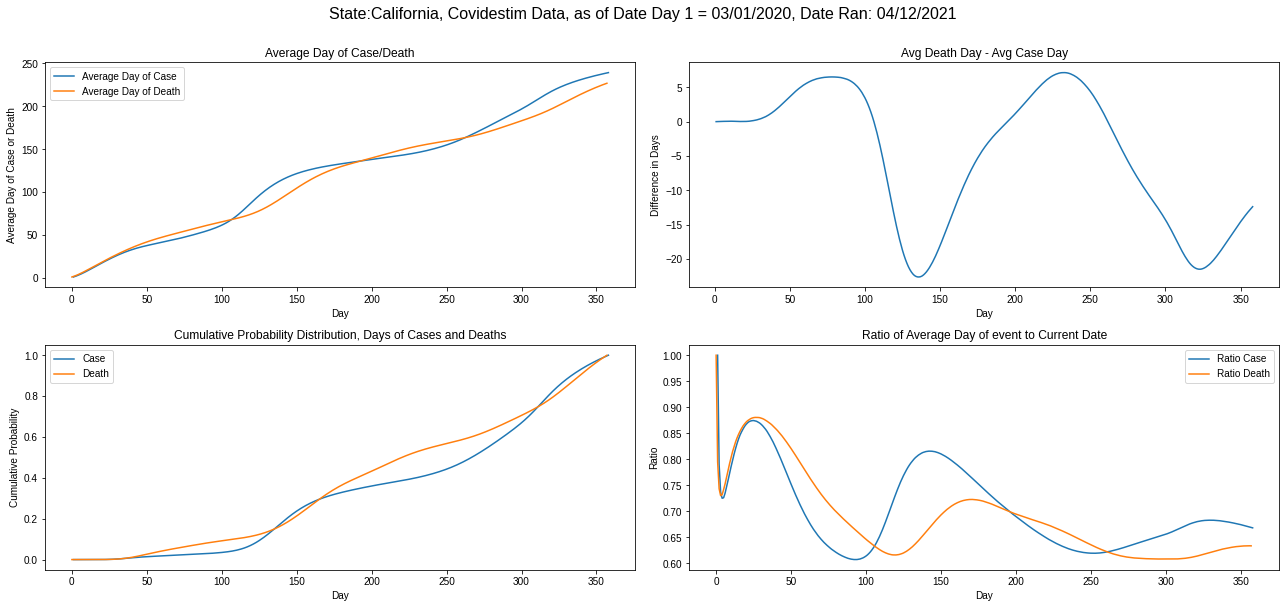

In [ ]:
plt.figure(figsize = (18,8))

plt.subplot(2,2,1)
plt.plot(df['Day'], df['Avg day of case'],df['Avg day of death'])
plt.title('Average Day of Case/Death')
plt.xlabel('Day')
plt.ylabel('Average Day of Case or Death')
plt.legend(['Average Day of Case','Average Day of Death'])
plt.subplot(2,2,2)
plt.plot(df['Day'], df['Avg Death Day - Avg Case Day'])
plt.title('Avg Death Day - Avg Case Day')
plt.xlabel('Day')
plt.ylabel('Difference in Days')

plt.subplot(2,2,3)
plt.plot(df['Day'],df['cdf_cases'],df['cdf_deaths'])
plt.title('Cumulative Probability Distribution, Days of Cases and Deaths')
plt.xlabel('Day')
plt.ylabel('Cumulative Probability')
plt.legend(['Case','Death'])

plt.subplot(2,2,4)
plt.plot(df['Day'], df['Avg Day of Case/ Current Day'], df['Avg Day of Death/ Current Day'])
plt.title('Ratio of Average Day of event to Current Date')
plt.xlabel('Day')
plt.ylabel('Ratio')
plt.legend(['Ratio Case','Ratio Death'])


plt.suptitle('State:California, Covidestim Data, as of Date Day 1 = 03/01/2020, Date Ran: 04/12/2021', size= 16,y=1.05)
plt.tight_layout()

plt.style.use('seaborn')